In [12]:
import altair as alt
import pandas as pd
import streamlit as st
from PIL import Image
import datetime as dt

import plotly.figure_factory as ff
from plotly import express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [13]:
dtypes = {
            "ms_played": "int",
            "trackName": "str",
            "artistName": "str",
            "reason_start": "str",
            "reason_end": "str",
            "shuffle": "bool",
            "skipped": "float"
        }
streaming_df = pd.read_csv(
            "../data/total_streaming_data.csv", parse_dates=["endTime"], dtype=dtypes, index_col=[0])

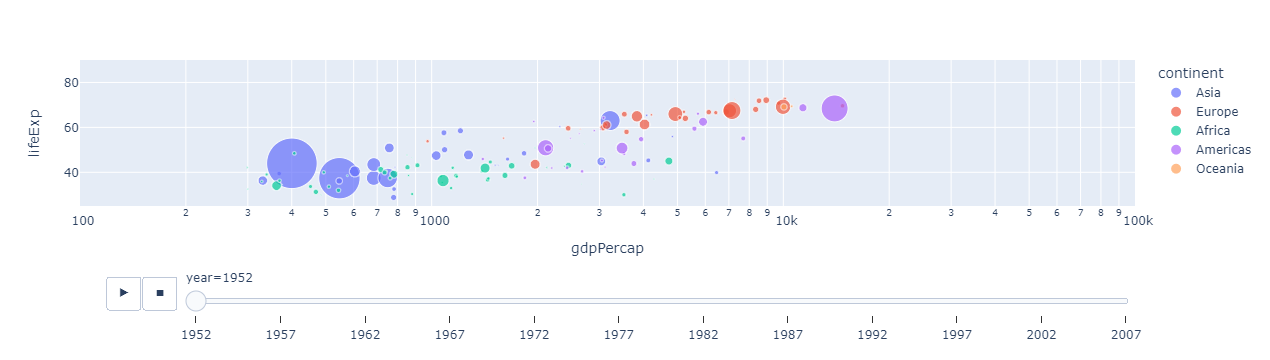

In [14]:
df = px.data.gapminder()
px.scatter(df, x="gdpPercap", y="lifeExp", animation_frame="year", animation_group="country",
           size="pop", color="continent", hover_name="country",
           log_x=True, size_max=55, range_x=[100,100000], range_y=[25,90])

In [15]:
streaming_df

,endTime,ms_played,trackName,artistName,reason_start,reason_end,shuffle,skipped
0,2013-09-13 13:21:20+00:00,295026,Invaders Must Die,The Prodigy,trackdone,trackdone,False,0.0
1,2018-06-11 10:08:43+00:00,10440,Friendzone,Adonis,clickrow,endplay,True,NaN
2,2015-08-18 09:40:04+00:00,9471,I Choose U,Timeflies,clickrow,endplay,False,1.0
3,2018-07-12 15:48:40+00:00,199401,Passionfruit,Drake,trackdone,fwdbtn,True,NaN
4,2014-08-18 20:34:35+00:00,3641,Follow the Lights,Orion,popup,popup,False,1.0
...,...,...,...,...,...,...,...,...
16335,2021-11-21 22:30:01+00:00,213640,Sex with My Ex,Lil Peep,trackdone,trackdone,False,NaN
16336,2017-05-05 05:34:04+00:00,1184,Alla vill till himmelen men ingen vill dö,Timbuktu,fwdbtn,fwdbtn,True,NaN
16337,2015-05-01 15:22:56+00:00,244363,They Don't Know (feat. Varren Wade),Loveless,trackdone,trackdone,False,0.0
16338,2013-10-02 15:56:20+00:00,203560,Back 2 Life (Live It Up) (feat. T.I.),Sean Kingston,trackdone,trackdone,False,0.0


In [16]:
group_df = streaming_df.groupby([(streaming_df.endTime.dt.year), (streaming_df.trackName)]).size().sort_values(ascending=False).reset_index(name='count') 

In [17]:
group_df

,endTime,trackName,count
0,2021,Alone,181
1,2021,Tyler,146
2,2021,NUMB,133
3,2021,lonewolf,131
4,2014,Numb / Encore,131
...,...,...,...
62969,2017,Now & Then - Tilø & ConKi Remix,1
62970,2017,Now I Know (What I Will Give You For Christmas),1
62971,2017,Now Or Never - Estiva Vs. Juventa Remix,1
62972,2017,Now You're Gone (feat. DJ Mental Theos Bazzhea...,1


In [18]:
df = streaming_df.groupby([(streaming_df.endTime.dt.year), (streaming_df.trackName)])\
.agg({'ms_played':'sum','trackName':'count', 'artistName':'first'}).rename(columns={'trackName':'count'}).reset_index()

In [19]:
df

,endTime,trackName,ms_played,count,artistName
0,2010,007 Is Also Gonna Die,22870,1,Nephew
1,2010,00:01,11551,1,Danger
2,2010,1 Thing,26641,1,Amerie
3,2010,100 Aar,14120,2,Kevin
4,2010,187 Ulm,3670,1,Snoop Dogg
...,...,...,...,...,...
62969,2022,you're my everything,6560,1,sadeyes
62970,2022,you*,126114,1,steve breaux
62971,2022,your favorite dress,5410,1,Lil Peep
62972,2022,Æ vil bare dans,22950,1,Sirkus Eliassen


In [20]:
df = df.groupby(['endTime']).apply(lambda x: x.nlargest(100,['count'])).reset_index(drop=True)

In [23]:
df

,endTime,trackName,ms_played,count,artistName
0,2010,Who's That Chick ? (feat. Rihanna) - Single Ve...,6488119,64,David Guetta
1,2010,Club Can't Handle Me (feat. David Guetta) - Fr...,5417380,35,Flo Rida
2,2010,Disco Pogo - Atzen Musik Mix,5842941,32,Die Atzen
3,2010,Find Your Love,4226113,30,Drake
4,2010,S&M,5610296,29,Rihanna
...,...,...,...,...,...
1295,2022,Heartaches,5330608,29,Shallou
1296,2022,Leave My Casket Open...,3776549,29,Arrested Youth
1297,2022,Where You Went Wrong,2621546,29,Kado
1298,2022,A New Error,8800883,28,Moderat


In [21]:
#df = df.nlargest(100, columns='count').sort_values(by='endTime')

Need to add legend and limit the legend.

This should be done by adding a new column with the generes. Only the top 10 genres are assigned. Songs with another genre will
have assigned a neutral value.

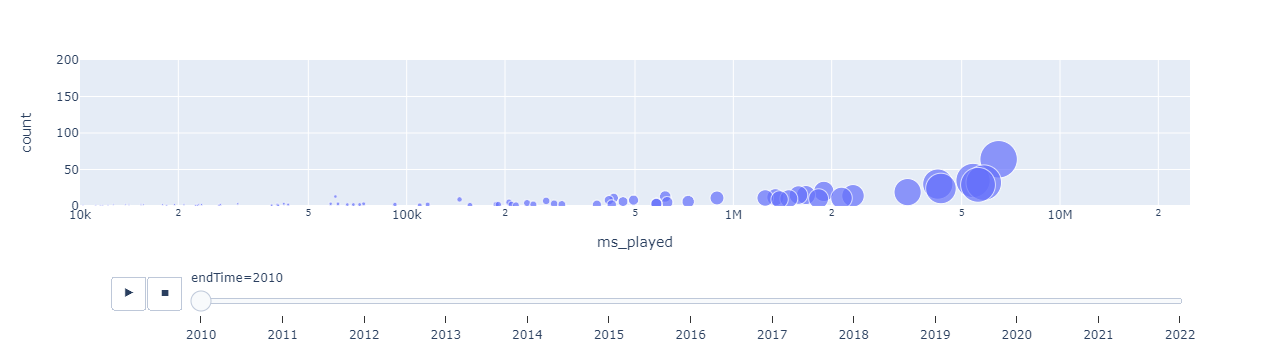

In [26]:
px.scatter(df, x="ms_played", y="count", animation_frame="endTime",
           size='ms_played', hover_name="trackName",hover_data={'artistName':True},
           log_x=True, size_max=60,range_y=[0,200], range_x=[10000,25000000])